# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
#掛載 google 雲端硬碟
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)
![DataFrame 的結構](/content/drive/MyDrive/Python/Python機器學習入門/Unit02/images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [ ]:
df["國文"] # 或df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [ ]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


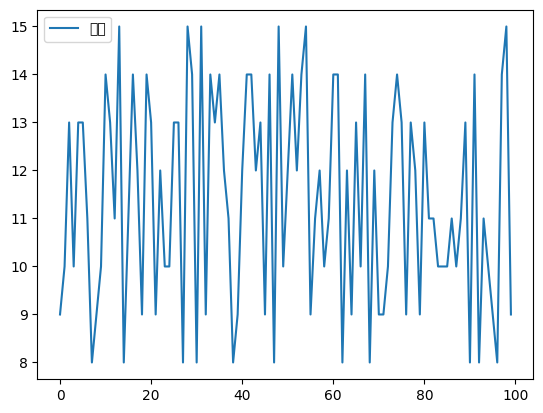

In [ ]:
# df.國文.plot()
df.國文.plot(legend=True)

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

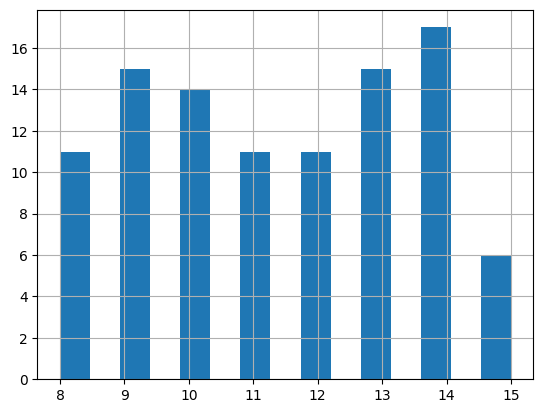

In [ ]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [ ]:
df.國文.mean()

11.39

算標準差。

In [ ]:
df.國文.std()

2.196852661459484

不如就該算的都幫我們算算...

In [ ]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [ ]:
df.corr()

<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [ ]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [ ]:
df["總級分"] = df.sum(axis=1)
df.head()

<ipython-input-18-59d935834dc5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df["總級分"] = df.sum(axis=1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


### 【技巧】

有計算的當然也可以的。

In [ ]:
# 加權動作
df["加權"] = df.國文 + df.英文 + df.數學*2

In [ ]:
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
...,...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55,37
96,吳筱婷,8,10,14,10,15,57,46
97,陳家銘,14,9,11,8,12,54,45
98,李明威,15,9,8,9,15,56,40


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [ ]:
df.sort_values( by="總級分", ascending=False)  # ascending:由小到大。False則由大到小

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,52
12,李正偉,11,15,11,14,15,66,48
54,陳怡潔,15,15,9,15,11,65,48
25,蔡亦瑄,13,13,14,13,12,65,54
57,胡淳茜,12,15,14,13,11,65,55
...,...,...,...,...,...,...,...,...
93,李曼夢,11,9,11,8,8,47,42
32,林建亨,9,11,8,8,11,47,36
1,胡玉華,10,10,10,8,9,47,40
7,林金鳳,8,9,10,10,8,45,37


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [ ]:
df2 = df.sort_values(by=["加權","總級分"], ascending=False)
df2.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
57,胡淳茜,12,15,14,13,11,65,55
36,詹威德,12,13,15,10,14,64,55
25,蔡亦瑄,13,13,14,13,12,65,54
83,李士賢,10,14,15,13,13,65,54
44,童心怡,13,13,14,8,13,61,54
37,曾怡君,11,12,15,13,14,65,53
48,陳怡婷,15,14,12,9,15,65,53
4,崔靜成,13,12,14,12,13,64,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】重設 index

In [ ]:
df2.index = range(1, 101)
df2.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
6,童心怡,13,13,14,8,13,61,54
7,曾怡君,11,12,15,13,14,65,53
8,陳怡婷,15,14,12,9,15,65,53
9,崔靜成,13,12,14,12,13,64,53
10,林哲法,14,9,15,10,14,62,53


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [ ]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
3,詹威德,12,13,15,10,14,64,55
5,李士賢,10,14,15,13,13,65,54
7,曾怡君,11,12,15,13,14,65,53
10,林哲法,14,9,15,10,14,62,53
13,陳竹伯,10,12,15,10,14,61,52
15,葉儀依,9,13,15,8,14,59,52
18,周育霖,9,12,15,13,12,61,51
21,張雅彬,10,11,15,12,8,56,51
22,芮秋辛,11,10,15,10,8,54,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [ ]:
df2[(df2.數學==15) & (df2.英文==15)]
# df2[(df2.數學==15) | (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [ ]:
df2.drop("總級分", axis=1)  # column

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [ ]:
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59,58
2,胡淳茜,12,15,14,13,11,65,55
3,詹威德,12,13,15,10,14,64,55
4,蔡亦瑄,13,13,14,13,12,65,54
5,李士賢,10,14,15,13,13,65,54
...,...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,51,36
97,胡凱琳,10,8,9,9,15,51,36
98,林建亨,9,11,8,8,11,47,36
99,梁慧君,9,8,8,8,12,45,33


In [ ]:
df2 = df2.drop("總級分", axis=1)  # column
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [ ]:
df2.drop("總級分", axis=1, inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
3,陳上紫,10,10,8,9,14,36
84,胡凱琳,10,8,9,9,15,36
32,林建亨,9,11,8,8,11,36
18,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [ ]:
df.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
5,張雅岳,13,12,12,12,8,57,49
6,梁俊翔,11,13,10,10,14,58,44
7,林金鳳,8,9,10,10,8,45,37
8,許協旺,9,9,12,10,10,50,42
9,郭雅惠,10,15,12,11,9,57,49


In [ ]:
df.drop(5).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53
6,梁俊翔,11,13,10,10,14,58,44
7,林金鳳,8,9,10,10,8,45,37
8,許協旺,9,9,12,10,10,50,42
9,郭雅惠,10,15,12,11,9,57,49
10,張志偉,14,9,8,10,12,53,39


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [ ]:
df2[df2.姓名 == "李士賢"]

,姓名,國文,英文,數學,自然,社會,加權
83,李士賢,10,14,15,13,13,54


In [ ]:
print(df2[df2.姓名 == "李士賢"])
print(df2[df2.姓名 == "李士賢"].index)
print()
print(df2.drop(df2[df2.姓名 == "李士賢"].index))

    姓名  國文  英文  數學  自然  社會  加權
5  李士賢  10  14  15  13  13  54
Int64Index([5], dtype='int64')

      姓名  國文  英文  數學  自然  社會  加權
1    吳志遠  13  15  15   8   8  58
2    胡淳茜  12  15  14  13  11  55
3    詹威德  12  13  15  10  14  55
4    蔡亦瑄  13  13  14  13  12  54
6    童心怡  13  13  14   8  13  54
..   ...  ..  ..  ..  ..  ..  ..
96   陳上紫  10  10   8   9  14  36
97   胡凱琳  10   8   9   9  15  36
98   林建亨   9  11   8   8  11  36
99   梁慧君   9   8   8   8  12  33
100  吳文伯   8   8   8  15  12  32

[99 rows x 7 columns]


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [ ]:
# https://discuss.python.org/t/issue-with-pandas-datareader-yahoo-financee/22086/4

In [ ]:
import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')
df = pdr.get_data_yahoo('AAPL', start='2022-10-24', end='2022-12-23')

TypeError: ignored

In [ ]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

# AAPL = pdr.get_data_yahoo('AAPL', start='2022-10-24', end='2022-12-23')
AAPL = pdr.get_data_yahoo('AAPL')

# print(AAPL)
df =AAPL

[*********************100%***********************]  1 of 1 completed


In [ ]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099450,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094261,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087343,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089504,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092099,73449600


#### 只要最後 300 個交易日!

In [ ]:
df = df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-02,147.830002,151.270004,146.860001,151.210007,150.109756,72348100
2022-06-03,146.899994,147.970001,144.460007,145.380005,144.322174,88570300
2022-06-06,147.029999,148.570007,144.899994,146.139999,145.076630,71598400
2022-06-07,144.350006,149.000000,144.100006,148.710007,147.627945,67808200
2022-06-08,148.580002,149.869995,147.460007,147.960007,146.883392,53950200
...,...,...,...,...,...,...
2023-08-07,182.130005,183.130005,177.350006,178.850006,178.608810,97576100
2023-08-08,179.690002,180.270004,177.580002,179.800003,179.557526,67823000
2023-08-09,180.869995,180.929993,177.009995,178.190002,177.949707,60378500


#### 20 日的移動平均

<Axes: xlabel='Date'>

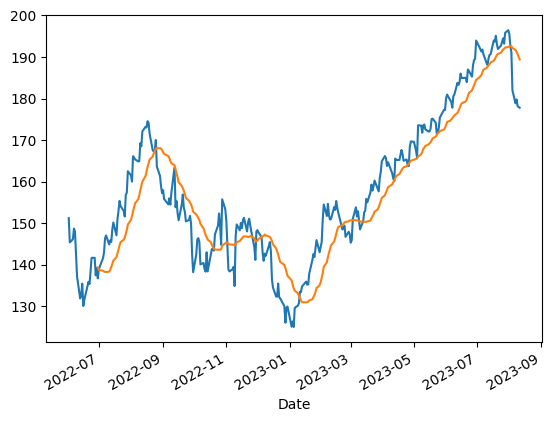

In [ ]:
df.Close.plot()
df.Close.rolling(20).mean().plot() # 20日移動平均

<Axes: xlabel='Date'>

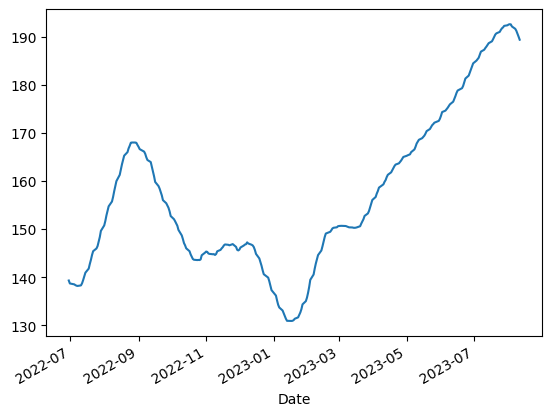

In [ ]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

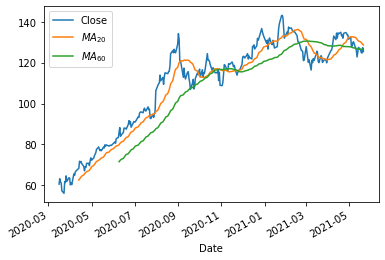

In [ ]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True) # _:讓字體變斜
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True) # {}:讓字體變小

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [ ]:
close = df.Close.values
len(close)

300

In [ ]:
x = close[:-1] # 起始到倒數第二個
len(x)

299

In [ ]:
y = close[1:]  # 第一個到最後一個
len(y)

299

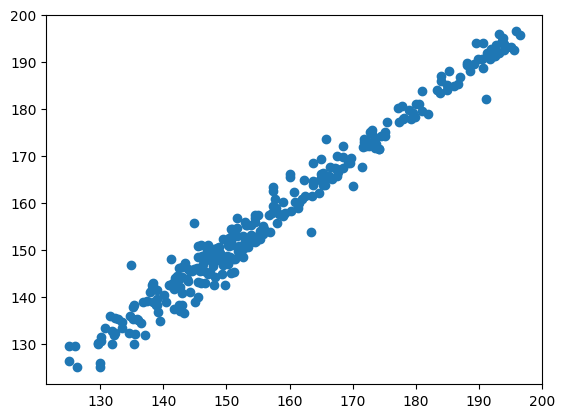

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [ ]:
mydata = np.random.randn(4,3)

In [ ]:
mydata

array([[-1.83334656, -0.36648463,  1.01390036],
       [-0.45302415, -0.25405741, -2.69454929],
       [ 1.0471454 ,  0.28642161, -0.71827895],
       [ 0.30336072, -0.06067633,  0.92529866]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [ ]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [ ]:
df2

,A,B,C
0,-1.833347,-0.366485,1.013900
1,-0.453024,-0.254057,-2.694549
2,1.047145,0.286422,-0.718279
3,0.303361,-0.060676,0.925299


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [ ]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [ ]:
df3

,A,B,C
0,-0.171660,1.542380,2.685066
1,0.786684,-1.182996,0.401870
2,-2.216455,0.299553,-1.112735


In [ ]:
# 如果用pd.concat(df2, df3)。則df2, df3會被當成引數，傳遞給concat()函數
# 所以用中括號，刮起來當成第一個引數
df4 = pd.concat([df2, df3], axis=0)

In [ ]:
df4

,A,B,C
0,-1.833347,-0.366485,1.013900
1,-0.453024,-0.254057,-2.694549
2,1.047145,0.286422,-0.718279
3,0.303361,-0.060676,0.925299
0,-0.075770,0.280965,2.210946
1,0.020335,1.179413,0.552030
2,0.622503,1.179315,1.124648


前面我們弄得亂七八糟的 index 重設一下。

In [ ]:
df4.index = range(7)

In [ ]:
df4

,A,B,C
0,-1.833347,-0.366485,1.013900
1,-0.453024,-0.254057,-2.694549
2,1.047145,0.286422,-0.718279
3,0.303361,-0.060676,0.925299
4,-0.075770,0.280965,2.210946
5,0.020335,1.179413,0.552030
6,0.622503,1.179315,1.124648


#### 横向的貼

In [ ]:
df5 = pd.concat([df2,df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [ ]:
df5

,A,B,C,A,B,C
0,-1.833347,-0.366485,1.013900,-0.075770,0.280965,2.210946
1,-0.453024,-0.254057,-2.694549,0.020335,1.179413,0.552030
2,1.047145,0.286422,-0.718279,0.622503,1.179315,1.124648
3,0.303361,-0.060676,0.925299,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

http://www.richyli.com/name/index.asp

In [ ]:
df_names = pd.read_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/names.csv", names=["姓名"])

In [ ]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [ ]:
# 6-16級分
# (100,5) shape大小
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
            columns=['國文','英文','數學','社會','自然'])

In [ ]:
df_grades

,國文,英文,數學,社會,自然
0,6,13,8,6,15
1,6,13,8,6,13
2,9,6,11,8,8
3,12,13,8,14,11
4,7,10,10,14,14
...,...,...,...,...,...
95,11,6,12,6,9
96,7,13,9,10,9
97,7,10,15,10,9
98,12,13,7,15,9


In [ ]:
df_grades.to_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/grade2.csv")

In [ ]:
df_grades = pd.read_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/grade2.csv")
df_grades

,Unnamed: 0,國文,英文,數學,社會,自然
0,0,6,13,8,6,15
1,1,6,13,8,6,13
2,2,9,6,11,8,8
3,3,12,13,8,14,11
4,4,7,10,10,14,14
...,...,...,...,...,...,...
95,95,11,6,12,6,9
96,96,7,13,9,10,9
97,97,7,10,15,10,9
98,98,12,13,7,15,9


In [ ]:
# concat
df_score = pd.concat([df_names,df_grades], axis=1)
df_score

,姓名,Unnamed: 0,國文,英文,數學,社會,自然
0,羅雅慧,0,6,13,8,6,15
1,王紹尹,1,6,13,8,6,13
2,黃季坤,2,9,6,11,8,8
3,許正書,3,12,13,8,14,11
4,張鈞蓮,4,7,10,10,14,14
...,...,...,...,...,...,...,...
95,陳君生,95,11,6,12,6,9
96,曾桂甫,96,7,13,9,10,9
97,林欣怡,97,7,10,15,10,9
98,林佳霖,98,12,13,7,15,9


In [ ]:
# 造成寫檔錯誤:

In [ ]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
            columns=['國文','英文','數學','社會','自然'])
df_grades.to_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/grade2.csv", index=0)
df_grades = pd.read_csv("/content/drive/MyDrive/Python/Python機器學習入門/Unit02/data/grade2.csv")
df_grades

,國文,英文,數學,社會,自然
0,12,10,14,13,9
1,14,15,8,14,13
2,13,11,12,6,13
3,12,8,15,7,9
4,7,9,7,10,13
...,...,...,...,...,...
95,11,15,9,7,9
96,14,12,8,14,6
97,15,13,12,15,10
98,8,15,12,12,9
